load_digits 데이터셋은 손글씨 숫자 이미지를 포함한 8x8 픽셀 데이터를 제공하는 간단한 데이터셋: 교재 300

NumPy 실습 과제
a) 데이터 이해 및 기본 처리
digits.data를 NumPy 배열로 확인하고 배열의 shape, 데이터 타입 등을 출력해 보세요.
각 샘플 이미지 데이터를 8x8 배열로 변환하여 특정 샘플 이미지를 시각화해 보세요.
각 이미지의 픽셀 값 평균을 구하세요.

b) 숫자 필터링
타겟 값(target)이 특정 숫자(예: 3)인 샘플만 필터링하여 별도의 배열로 저장하세요.
필터링된 샘플의 평균 픽셀 값을 계산하세요.

c) 데이터 변환
모든 픽셀 값을 0~1 사이로 정규화하세요.

Pandas 실습 과제
a) 데이터프레임 생성 및 탐색
digits.data와 digits.target을 결합하여 Pandas DataFrame을 생성하세요.
각 숫자(0~9)가 몇 개씩 포함되어 있는지 확인하세요.

b) 숫자별 통계
각 숫자(0~9)에 대해 평균 픽셀 값을 계산하여 새로운 DataFrame으로 나타내세요.
숫자별로 가장 밝은(최대 픽셀 값이 높은) 이미지를 찾으세요.

c) 데이터 시각화
각 숫자(0~9)에 대해 샘플 이미지를 시각화하는 함수 plot_sample_images를 작성하세요.
숫자별 픽셀 값 분포를 박스 플롯(Box plot)으로 그리세요.


종합 과제
a) 이미지 분류 모델
DataFrame에서 target 열을 제외한 데이터를 NumPy 배열로 변환하세요.
분류를 위해 데이터를 훈련 세트와 테스트 세트로 나누세요.
간단한 k-NN 또는 SVM 모델을 사용하여 숫자를 분류하는 코드를 작성하세요.

b) EDA(탐색적 데이터 분석)
각 숫자의 평균 이미지를 생성하여 시각화하세요.
숫자별로 데이터의 분포를 비교하는 히스토그램을 작성하세요.

5장 과제
PCA를 사용한 차원 축소: digits.data의 차원을 줄여 2D 또는 3D로 시각화하세요.

군집화: K-Means 알고리즘을 사용하여 데이터 포인트를 10개의 클러스터로 나누고 결과를 시각화하세요.

In [3]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------  10.7/11.0 MB 83.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 36.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ------ --------------------------------- 7.1/44.5 MB 31.1 MB/s eta 0:00:02
   ------------------------- -------------- 28.3/44.5 MB 66.5 MB/s eta 0:00:01
   ------------------------------- -------- 34.6/44.5 MB 71.0 MB/s eta 0:00:01
   -------------------------------------- - 43.0/44.5 MB 51.6 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 44.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt


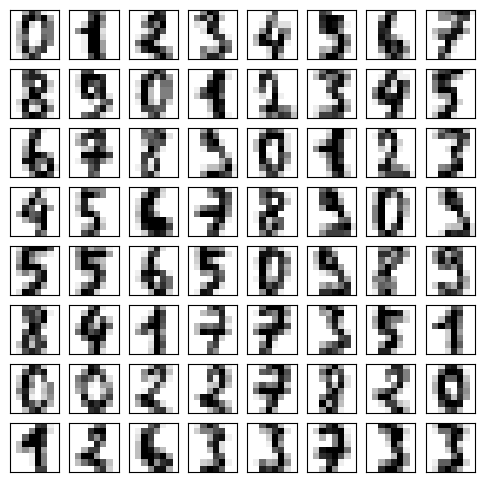

In [43]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

fig, ax = plt.subplots(8,8, figsize=(6,6))
for i , axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap='binary')
  axi.set(xticks=[], yticks=[])

In [44]:
print(digits.data.shape)
print(digits.data.dtype)

(1797, 64)
float64


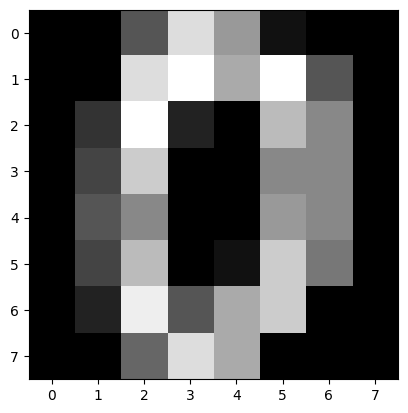

In [34]:
plt.imshow(digits.data.reshape(-1,8,8)[0],cmap="gray")

In [35]:
np.mean(digits.data, axis=1)  


array([4.59375 , 4.890625, 5.375   , ..., 5.296875, 5.421875, 6.234375])

In [30]:
dg= digits.data[digits.target == 3]
dg.mean()

np.float64(4.794313524590164)

In [31]:
maxdg = np.max(digits.data)
maxdg

np.float64(16.0)

In [32]:
ndg = digits.data/ maxdg
print(np.min(ndg))
print(np.max(ndg))

0.0
1.0


(array([36622.,  3679.,  1958.,  3261.,  1531.,  3711.,  3218.,  2145.,
         3957.,  9230.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

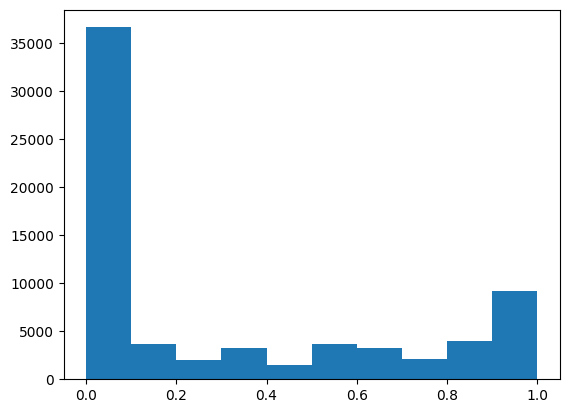

In [36]:
plt.hist(ndg.flatten())

In [60]:
data = pd.DataFrame(digits.data)
data['target'] = digits.target
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


<Axes: xlabel='target'>

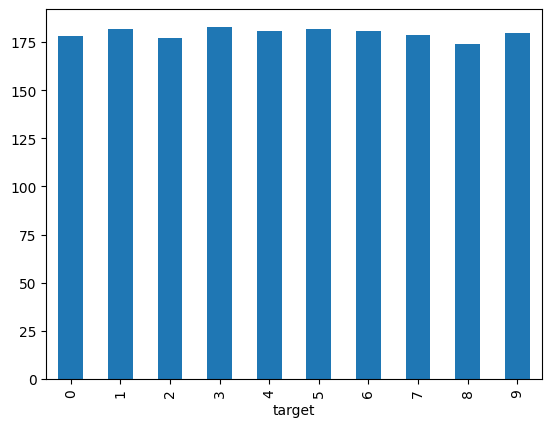

In [57]:
data['target'].value_counts().sort_index().plot.bar()

In [61]:
data.iloc[:,:-1].mean(axis=1)

0       4.593750
1       4.890625
2       5.375000
3       4.171875
4       4.031250
          ...   
1792    5.312500
1793    6.234375
1794    5.843750
1795    5.375000
1796    6.125000
Length: 1797, dtype: float64

In [64]:
for i in np.arange(10):
  print(i)
  mask = data['target'] == i
  print(data[mask].iloc[:,:-1].mean())

0
0      0.000000
1      0.022472
2      4.185393
3     13.095506
4     11.297753
        ...    
59    13.561798
60    13.325843
61     5.438202
62     0.275281
63     0.000000
Length: 64, dtype: float64
1
0      0.000000
1      0.010989
2      2.456044
3      9.208791
4     10.406593
        ...    
59     9.137363
60    13.027473
61     8.576923
62     3.049451
63     1.494505
Length: 64, dtype: float64
2
0      0.000000
1      0.932203
2      9.666667
3     14.186441
4      9.627119
        ...    
59    13.966102
60    13.118644
61    11.796610
62     8.022599
63     1.932203
Length: 64, dtype: float64
3
0      0.000000
1      0.644809
2      8.387978
3     14.169399
4     14.224044
        ...    
59    14.650273
60    13.972678
61     8.672131
62     1.409836
63     0.065574
Length: 64, dtype: float64
4
0      0.000000
1      0.000000
2      0.453039
3      7.055249
4     11.497238
        ...    
59     7.812155
60    11.812155
61     1.955801
62     0.000000
63     0.000000
Le

In [65]:
data.groupby('target').mean()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
target,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.022472,4.185393,13.095506,11.297753,2.926966,0.033708,0.000000,0.000000,0.887640,...,2.415730,0.000000,0.00000,0.005618,4.157303,13.561798,13.325843,5.438202,0.275281,0.000000
1,0.0,0.010989,2.456044,9.208791,10.406593,6.076923,0.994505,0.000000,0.000000,0.093407,...,2.049451,0.642857,0.00000,0.005495,2.241758,9.137363,13.027473,8.576923,3.049451,1.494505
2,0.0,0.932203,9.666667,14.186441,9.627119,2.384181,0.107345,0.000000,0.011299,5.276836,...,7.180791,0.711864,0.00565,0.943503,10.096045,13.966102,13.118644,11.796610,8.022599,1.932203
3,0.0,0.644809,8.387978,14.169399,14.224044,7.480874,0.786885,0.005464,0.010929,4.207650,...,5.928962,0.065574,0.00000,0.502732,9.316940,14.650273,13.972678,8.672131,1.409836,0.065574
4,0.0,0.000000,0.453039,7.055249,11.497238,2.011050,0.209945,0.127072,0.000000,0.060773,...,0.022099,0.000000,0.00000,0.022099,0.552486,7.812155,11.812155,1.955801,0.000000,0.000000
5,0.0,0.967033,9.983516,13.038462,13.895604,12.181319,4.142857,0.043956,0.005495,3.895604,...,1.335165,0.000000,0.00000,0.956044,10.664835,14.736264,9.362637,2.532967,0.197802,0.000000
6,0.0,0.000000,1.138122,11.165746,9.585635,1.447514,0.011050,0.000000,0.000000,0.033149,...,10.779006,0.524862,0.00000,0.000000,1.436464,10.685083,15.093923,13.044199,4.480663,0.093923
7,0.0,0.167598,5.100559,13.061453,14.245810,11.027933,5.189944,1.000000,0.000000,1.094972,...,0.000000,0.000000,0.00000,0.122905,6.391061,11.659218,2.206704,0.011173,0.000000,0.000000
8,0.0,0.143678,5.022989,11.603448,12.402299,6.235632,0.528736,0.000000,0.028736,1.977011,...,2.316092,0.005747,0.00000,0.143678,5.005747,12.695402,13.011494,6.735632,1.206897,0.011494


In [69]:
for target, group in data.groupby('target'):
  print(target,group.iloc[:,:-1].mean(axis=1).argmax())
  print(target,group.iloc[:,:-1].mean(axis=1).idxmax())

0 20
0 185
1 81
1 818
2 62
2 629
3 137
3 1349
4 96
4 988
5 46
5 457
6 39
6 402
7 110
7 1113
8 86
8 898
9 47
9 491


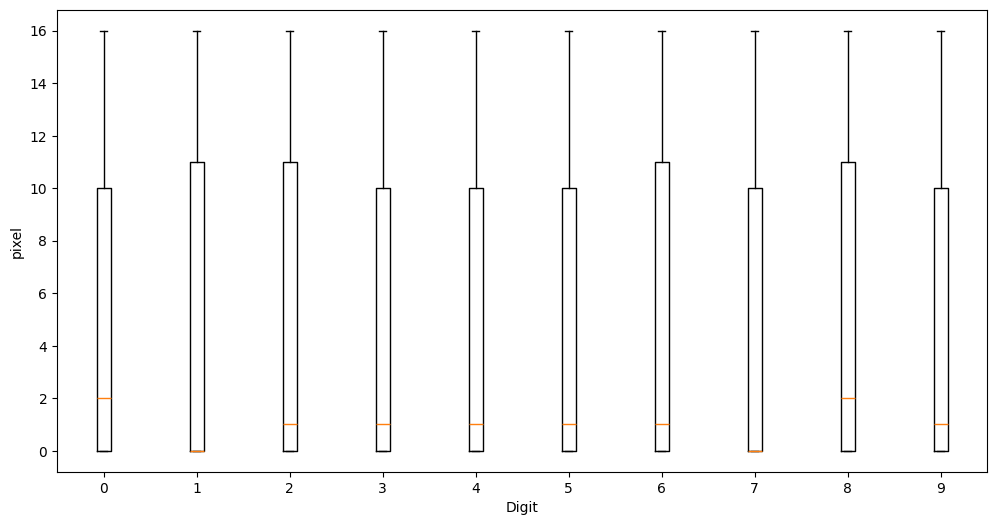

In [73]:
unique_digits = sorted(data['target'].unique())
plt.figure(figsize=(12,6))

for digit in unique_digits:
  group_data = data[data['target']== digit].iloc[:,:-1].values.flatten()
  plt.boxplot(group_data, positions=[digit])

plt.xlabel('Digit')
plt.ylabel("pixel")
plt.xticks(ticks=unique_digits, labels=unique_digits)
plt.show()